In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import category_encoders as ce 
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('all_commodities.csv')
df.head()

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_Price,Max_Price,Modal_Price,Commodity_Code,Year,Season,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Karnataka,Bangalore,Bangalore,Rice,Coarse,FAQ,04/08/2001,900.0,1000.0,950,3,2001,Kharif,1087967.0,2393946.0,1002.9,1.111141e+08,282871.42,2.154815
1,Karnataka,Bangalore,Bangalore,Rice,Coarse,FAQ,04/08/2001,900.0,1000.0,950,3,2001,Rabi,53480.0,99699.0,1002.9,5.461912e+06,13904.80,1.840714
2,Karnataka,Bangalore,Bangalore,Rice,Coarse,FAQ,04/08/2001,900.0,1000.0,950,3,2001,Summer,276277.0,740400.0,1002.9,2.821617e+07,71832.02,2.436800
3,Karnataka,Bangalore,Bangalore,Rice,Coarse,FAQ,20/12/2001,900.0,500.0,400,3,2001,Kharif,1087967.0,2393946.0,1002.9,1.111141e+08,282871.42,2.154815
4,Karnataka,Bangalore,Bangalore,Rice,Coarse,FAQ,20/12/2001,900.0,500.0,400,3,2001,Rabi,53480.0,99699.0,1002.9,5.461912e+06,13904.80,1.840714


In [3]:
df.columns

Index(['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade',
       'Arrival_Date', 'Min_Price', 'Max_Price', 'Modal_Price',
       'Commodity_Code', 'Year', 'Season', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

In [4]:
df['District'].unique()

array(['Bangalore', 'Patna', 'Indore', 'Lucknow'], dtype=object)

In [13]:
df['Grade'].unique()

array(['FAQ', 'Medium', 'Large', 'Small', 'Local'], dtype=object)

In [5]:
df['Date']=pd.to_datetime(df['Arrival_Date'],dayfirst=True)
df['Date']=df['Date'].apply(lambda x: x.timestamp())

In [14]:
grade_order={
    "Large":3,
    "Medium":2,
    "Small":1,
    "FAQ":0,
    "Local":0
}
df['grade_encoded']=df['Grade'].map(grade_order)

In [16]:
X=df[['Date','Year','District','grade_encoded','Commodity_Code','Annual_Rainfall','Yield']]
y=df['Modal_Price']

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [18]:
X_train.shape

(116825, 7)

In [19]:
X_test.shape

(50069, 7)

In [20]:
y_test.shape

(50069,)

In [21]:
encoder=ce.TargetEncoder(cols=['District'])

X_train['District']=encoder.fit_transform(X_train['District'],y_train)
X_test['District']=encoder.transform(X_test['District'])

In [22]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [28]:
y_pred=lm.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(y_pred)[:10])
print('Actual labels   : \n',y_test[:10])

Predicted labels:  [1652. 1280. 1892. 2400. 1813. 1048. 1089.  324.  -95. 1899.]
Actual labels   : 
 142911     800
156503    1150
29630     1200
101524    3800
162452    1600
147328     925
92720      600
40822      415
14439      300
52814     1450
Name: Modal_Price, dtype: int64


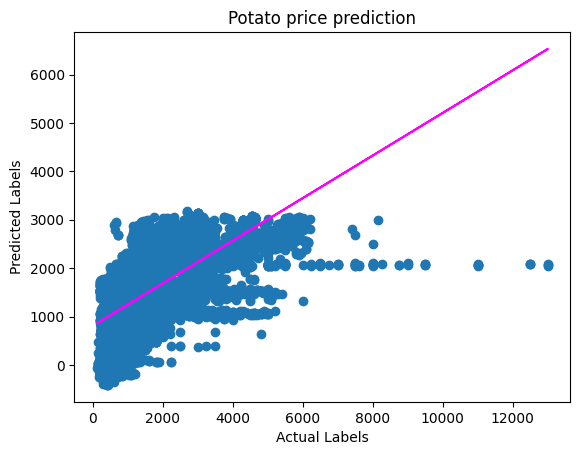

In [30]:
%matplotlib inline

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Potato price prediction')
# overlay the regression line
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MSE: 493403.63681044686
RMSE: 702.4269619045434
R2: 0.4375396742032379


In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

model=DecisionTreeRegressor()
model.fit(X_train,y_train)
print(model,'\n')

tree=export_text(model)

DecisionTreeRegressor() 



MSE: 300608.37315186235
RMSE: 548.2776423964982
R2: 0.6573185301323844


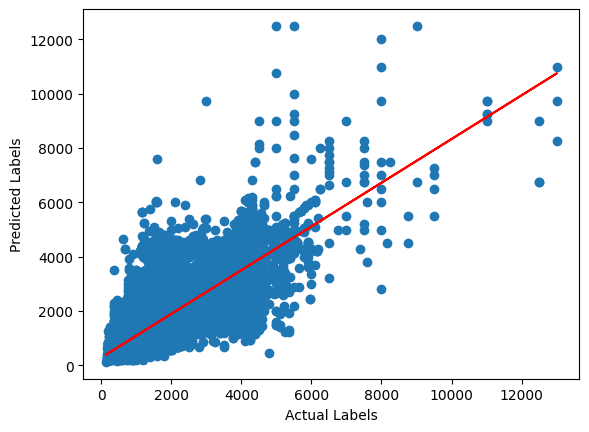

In [33]:
predictions=model.predict(X_test)
mse=mean_squared_error(y_test,predictions)
print("MSE:",mse)
rmse=np.sqrt(mse)
print("RMSE:",rmse)
r2=r2_score(y_test,predictions)
print("R2:",r2)

plt.scatter(y_test,predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

z=np.polyfit(y_test,predictions,1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test),color='red')

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [45]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
}

In [46]:
rf = RandomForestRegressor(random_state=42)

In [47]:
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,scoring='r2',n_jobs=-1,verbose=2)


In [48]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'n_estimators': [100, 200]},
             scoring='r2', verbose=2)

In [49]:
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best R² Score: 0.8088276466606288


MSE: 172319.07453167072
RMSE: 415.11332733564547
R2: 0.8035631771410813


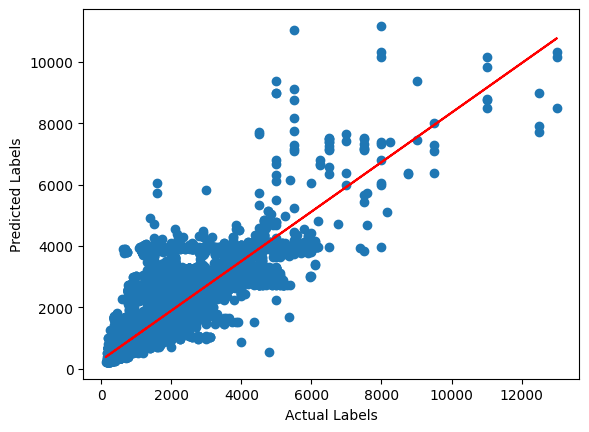

In [51]:
best_rf = grid_search.best_estimator_
predictions=best_rf.predict(X_test)
mse=mean_squared_error(y_test,predictions)
print("MSE:",mse)
rmse=np.sqrt(mse)
print("RMSE:",rmse)
r2=r2_score(y_test,predictions)
print("R2:",r2)

plt.scatter(y_test,predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

z=np.polyfit(y_test,predictions,1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test),color='red')

In [52]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

MSE: 167702.25758539292
RMSE: 409.5146610139775
R2: 0.808826208114624


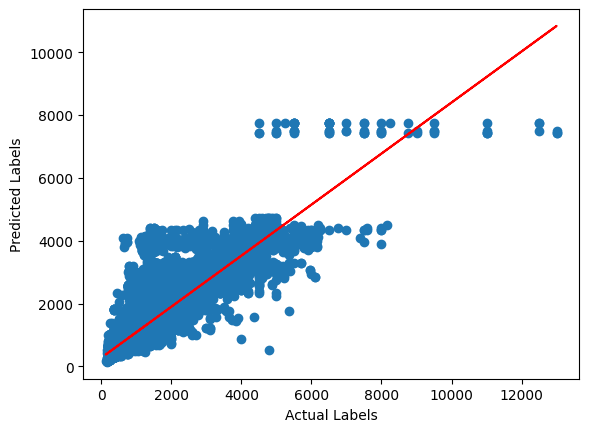

In [53]:
predictions=xgb.predict(X_test)
mse=mean_squared_error(y_test,predictions)
print("MSE:",mse)
rmse=np.sqrt(mse)
print("RMSE:",rmse)
r2=r2_score(y_test,predictions)
print("R2:",r2)

plt.scatter(y_test,predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

z=np.polyfit(y_test,predictions,1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test),color='red')